In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer

In [2]:
file_path = r'D:\User\Desktop\GT\jupyter\auto+mpg\auto-mpg.data'

column_names = ['mpg', 'cylinders', 'displacement', 'horsepower',
                'weight', 'acceleration', 'model_year', 'origin', 'car_name']

df = pd.read_csv(file_path, sep=r'\s+', names=column_names,na_values='?')
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_3216\765282535.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


In [3]:
df.shape

(398, 9)

In [4]:
df = df.drop(columns=['car_name','origin'])

In [5]:
round(df.describe(),2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.00,398.00,398.00,392.00,398.00,398.00,398.00
mean,23.51,5.45,193.43,104.47,2970.42,15.57,76.01
std,7.82,1.70,104.27,38.49,846.84,2.76,3.70
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00
25%,17.50,4.00,104.25,75.00,2223.75,13.82,73.00
50%,23.00,4.00,148.50,93.50,2803.50,15.50,76.00
75%,29.00,8.00,262.00,126.00,3608.00,17.18,79.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00


In [6]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
dtype: int64

In [7]:
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
coltoimpute = ['horsepower']
df[coltoimpute] = imputer.fit_transform(df[coltoimpute])
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
dtype: int64

# Data Visualization

Cylinders 3: 4
Cylinders 4: 204
Cylinders 5: 3
Cylinders 6: 84
Cylinders 7: 0
Cylinders 8: 103


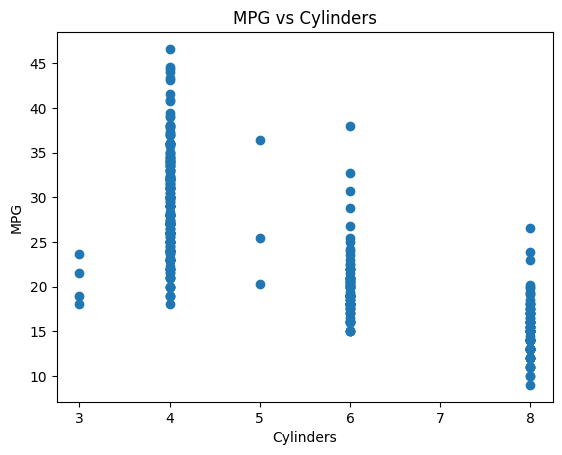

In [8]:
gr = df.drop("mpg",axis = 1).values.tolist()
gry = df['mpg'].values.tolist()
grx = [row[0] for row in gr]
c3=c4=c5=c6=c7=c8=0
for i in grx:
    if i == 3:
        c3 += 1
    elif i == 4:
        c4 += 1
    elif i == 5:
        c5 += 1
    elif i == 6:
        c6 += 1
    elif i == 7:
        c7 += 1
    elif i == 8:
        c8 += 1
print(f"Cylinders 3: {c3}")
print(f"Cylinders 4: {c4}")
print(f"Cylinders 5: {c5}")
print(f"Cylinders 6: {c6}")
print(f"Cylinders 7: {c7}")
print(f"Cylinders 8: {c8}")
plt.scatter(grx, gry)
plt.xlabel("Cylinders")
plt.ylabel("MPG")
plt.title("MPG vs Cylinders")
plt.show()


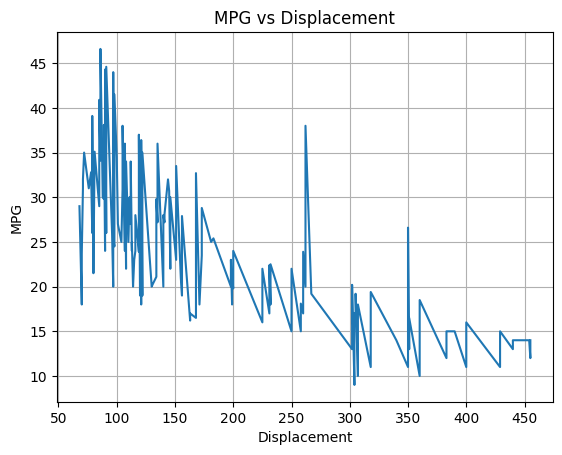

In [9]:
grx = [row[1] for row in gr]
combined = sorted(zip(grx, gry))  
sorted_grx, sorted_gry = zip(*combined)

plt.plot(sorted_grx, sorted_gry)
plt.xlabel("Displacement")
plt.ylabel("MPG")
plt.title("MPG vs Displacement")
plt.grid(True)
plt.show()

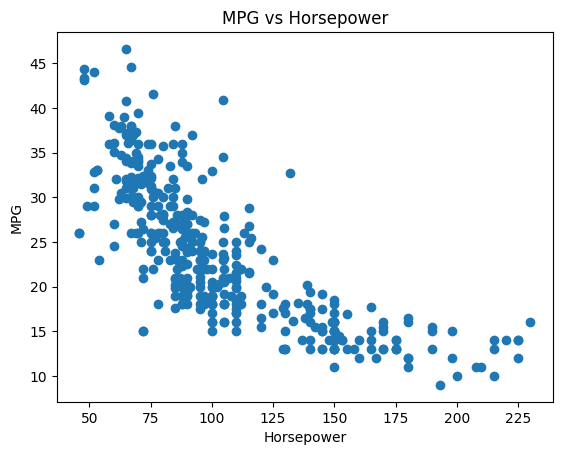

In [10]:
grx = [row[2] for row in gr]
plt.scatter(grx, gry)
plt.xlabel("Horsepower")
plt.ylabel("MPG")
plt.title("MPG vs Horsepower")
plt.show()

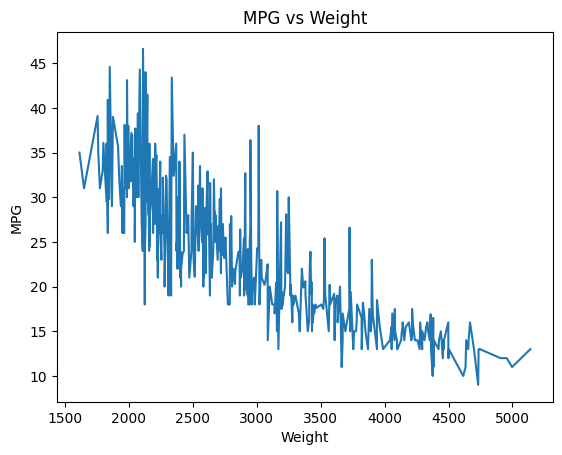

In [11]:
grx = [row[3] for row in gr]
combined = sorted(zip(grx, gry))  
sorted_grx, sorted_gry = zip(*combined)

plt.plot(sorted_grx, sorted_gry)
plt.xlabel("Weight")
plt.ylabel("MPG")
plt.title("MPG vs Weight")
plt.show()

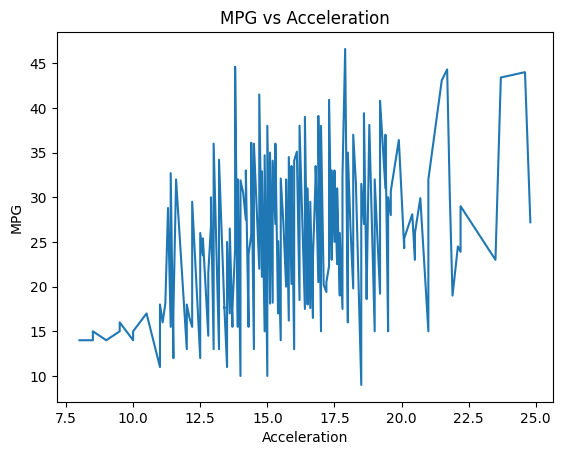

Confounding in data
Data of Acceleration is affected by other factors causing distortion.


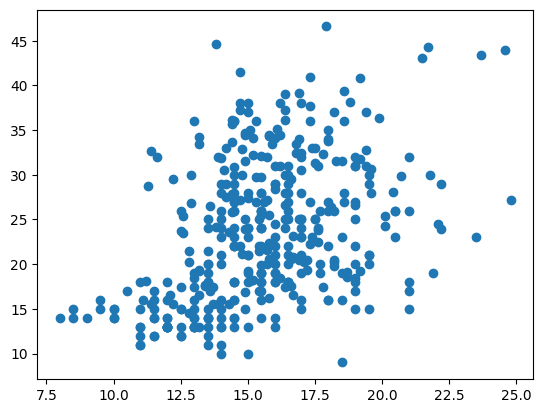

In [12]:
grx = [row[4] for row in gr]
combined = sorted(zip(grx, gry))  
sorted_grx, sorted_gry = zip(*combined)

plt.plot(sorted_grx, sorted_gry)
plt.xlabel("Acceleration")
plt.ylabel("MPG")
plt.title("MPG vs Acceleration")
plt.show()
plt.scatter(grx, gry)
print("Confounding in data\nData of Acceleration is affected by other factors causing distortion.")

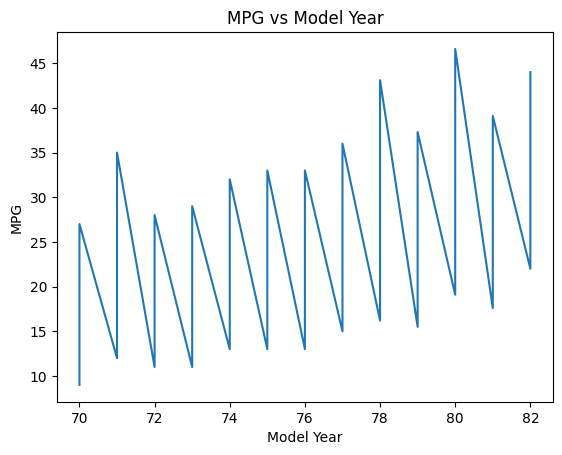

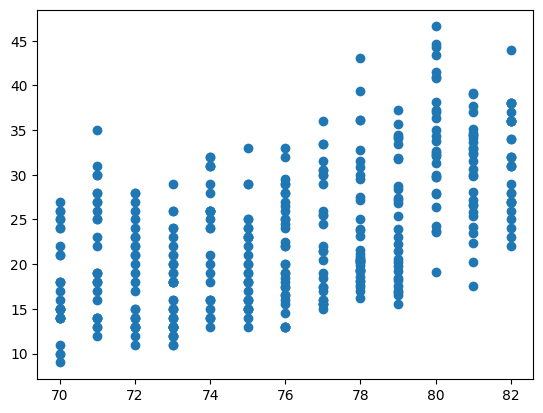

In [13]:
grx = [row[5] for row in gr]
combined = sorted(zip(grx, gry))  
sorted_grx, sorted_gry = zip(*combined)

plt.plot(sorted_grx, sorted_gry)
plt.xlabel("Model Year")
plt.ylabel("MPG")
plt.title("MPG vs Model Year")
plt.show()
plt.scatter(grx, gry)

# Linear Regression

In [14]:
y = df['mpg']
y

0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
393    27.0
394    44.0
395    32.0
396    28.0
397    31.0
Name: mpg, Length: 398, dtype: float64

In [15]:
X = df.drop(columns='mpg')
X

,cylinders,displacement,horsepower,weight,acceleration,model_year
0,8,307.0,130.0,3504.0,12.0,70
1,8,350.0,165.0,3693.0,11.5,70
2,8,318.0,150.0,3436.0,11.0,70
3,8,304.0,150.0,3433.0,12.0,70
4,8,302.0,140.0,3449.0,10.5,70
...,...,...,...,...,...,...
393,4,140.0,86.0,2790.0,15.6,82
394,4,97.0,52.0,2130.0,24.6,82
395,4,135.0,84.0,2295.0,11.6,82
396,4,120.0,79.0,2625.0,18.6,82


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)
X_train

,cylinders,displacement,horsepower,weight,acceleration,model_year
254,6,200.0,85.0,2965.0,15.8,78
246,4,78.0,52.0,1985.0,19.4,78
282,4,140.0,88.0,2890.0,17.3,79
81,4,97.0,92.0,2288.0,17.0,72
347,4,85.0,65.0,1975.0,19.4,81
...,...,...,...,...,...,...
323,4,156.0,105.0,2800.0,14.4,80
192,6,250.0,105.0,3353.0,14.5,76
117,4,68.0,49.0,1867.0,19.5,73
47,6,250.0,100.0,3282.0,15.0,71


In [17]:
from sklearn.preprocessing import StandardScaler
colum = X_train.columns
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
X_train = pd.DataFrame(X_train, columns=[colum])
X_test = pd.DataFrame(X_test, columns=[colum])

In [19]:
X_train.describe()

,cylinders,displacement,horsepower,weight,acceleration,model_year
count,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02,2.980000e+02
mean,-2.205544e-16,3.874604e-17,-1.430623e-16,1.974558e-17,7.093505e-16,1.935812e-15
std,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00,1.001682e+00
min,-1.441717e+00,-1.220887e+00,-1.586955e+00,-1.443667e+00,-2.882779e+00,-1.687691e+00
25%,-8.571841e-01,-8.585466e-01,-7.132312e-01,-8.876460e-01,-6.054932e-01,-8.605005e-01
50%,-8.571841e-01,-4.080688e-01,-2.490652e-01,-1.655595e-01,-3.617166e-02,-3.330970e-02
75%,1.480947e+00,7.156773e-01,5.700513e-01,7.403847e-01,5.331499e-01,7.938811e-01
max,1.480947e+00,2.569002e+00,3.436959e+00,2.571549e+00,3.417712e+00,1.621072e+00


**Scratch Model**

In [20]:
def costcalcu(x,y,w,b):
    m = len(y)
    y_pred = np.dot(x, w) + b
    cost = (1 / (2 * m)) * np.sum((y_pred - y) ** 2)
    return cost

In [21]:
def mullinregress(x,y,w,b,learning_rate,iterations):
    m,n=x.shape
    cost = []
    for i in range(iterations):
        ypred = np.dot(x,w) + b
        error = ypred - y
        dw = np.dot(x.T,error)/m
        db = np.sum(error)/m
        w-=learning_rate*dw
        b-=learning_rate*db
        c = costcalcu(x,y,w,b)
        cost.append(c)
    return w,b,cost

In [22]:
def main(x,y):
    learning_rate = 0.01
    iterations = 1000
    w = np.zeros(x.shape[1])
    w,b,cost = mullinregress(x,y,w,0,learning_rate,iterations)
    print(f"Weight calculated = {w}")
    print(f"Bias calculated = {b}")

    plt.plot(range(iterations),cost)
    plt.xlabel("Iterations")
    plt.ylabel("Cost")
    plt.show()

    y_pred = np.dot(x, w) + b
    print("MSE:", mean_squared_error(y, y_pred))
    print("R² Score:", r2_score(y, y_pred))

Weight calculated = [-0.27940703 -0.70681079 -1.03967916 -3.72475179 -0.05748956  2.60522401]
Bias calculated = 23.45301430604185


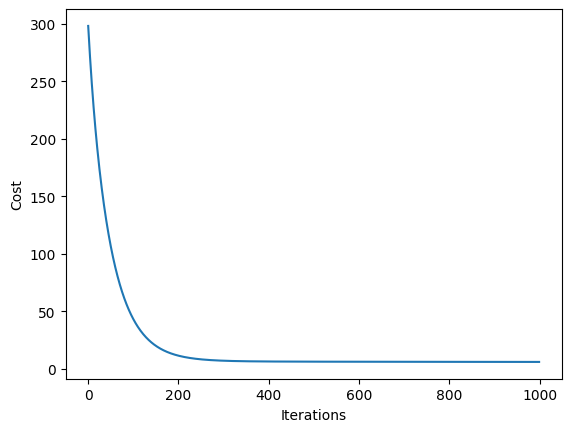

MSE: 12.22146548591333
R² Score: 0.7976814629578914


In [23]:
X1 = np.array(X_train)
y1 = np.array(y_train)
x2 = np.array(X_test)
main(X_train,y_train)

**Sklearn**

In [24]:
lregress = LinearRegression()
lregress.fit(X_train,y_train)
y_pred = lregress.predict(X_test)
print("Sklearn evaluation: \n")
print("MSE:", mean_squared_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

Sklearn evaluation: 

MSE: 11.683794532078105
R² Score: 0.8129673422321916
